In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from google.colab import files
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adadelta, Adam


In [5]:
files.upload()
cars = pd.read_csv('cars_new.csv', sep=',')

Saving cars_new.csv to cars_new.csv


In [0]:
def create_dict(s):
  ret = {} 
  for _id, name in enumerate(s): 
    ret.update({name: _id}) 
  return ret

def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

In [0]:
#Создаём словари по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

#Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [0]:
#Создаём пустую обучающую выборку
x_train = []
y_train = []

#Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  #В y_train добавляем цену
  y_train.append(prices[_id])
  
  #В x_train объединяем все параметры
  #Категорийные параметры добавляем в ваде ohe
  #Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  #Добавляем текущую строку в общий z_train
  x_train.append(x_tr)

#Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

In [0]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

In [0]:
# Обучение  сети
def train_net(net, batch, epochs):
  n_val = 60000
  history = net.fit(x_train[:n_val], 
                      y_train_scaled[:n_val],
                      batch_size=batch,
                      epochs=epochs, 
                      validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                      verbose=1)

  plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
  plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('MSE')
  plt.legend()
  plt.show()

  predict = net.predict(x_train[n_val:])
  predict = y_scaler.inverse_transform(predict).flatten()

  delta = predict - y_train[n_val:]
  abs_delta = abs(delta)

  mean_delta = sum(abs_delta)/len(abs_delta)
  mean_price = sum(y_train[n_val:])/len(y_train[n_val:])
  print("Средняя ошибка: ", round(mean_delta))
  print("Средняя цена: ", round(mean_price))
  print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

In [0]:
def net1():
  model = Sequential()
  model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dense(2500, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(optimizer=Adam(lr=0.01), loss='mse')
  return model



In [0]:
def net2():
  model = Sequential()
  model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dense(2500, activation='relu'))
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(optimizer=Adam(lr=0.01), loss='mse')
  return model


In [0]:
def net3():
  model = Sequential()
  model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(1, activation='softmax'))

  model.compile(optimizer=Adam(lr=0.01), loss='mse')
  return model


In [0]:
def net4():
  model = Sequential()
  model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dropout(0.2))
  model.add(Dense(2500, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='linear'))

  model.compile(optimizer=Adam(lr=0.01), loss='mse')
  return model



In [0]:
def net5():
  model = Sequential()
  model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dropout(0.2))
  model.add(Dense(2500, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2500, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2500, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='linear'))

  model.compile(optimizer=Adam(lr=0.1), loss='mse')
  return model



In [0]:
def net6():
  model = Sequential()
  model.add(Dense(2500, activation='tanh', input_shape=(x_train.shape[1],)))
  model.add(Dense(2500, activation='relu'))
  model.add(Dense(1, activation='tanh'))

  model.compile(optimizer=Adam(lr=0.01), loss='mse')
  return model


In [0]:
def net7():
  model = Sequential()
  model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dense(2500, activation='relu'))
  model.add(Dense(1, activation='relu'))

  model.compile(optimizer=Adam(lr=0.001), loss='mse')
  return model

In [0]:
def net8():
  model = Sequential()
  model.add(Dense(2500, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dense(2500, activation='relu'))
  model.add(Dense(1, activation='relu'))

  model.compile(optimizer=Adam(lr=0.1), loss='mse')
  return model

In [0]:
def net9():
  model = Sequential()
  model.add(Dense(10000, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dense(5000, activation='relu'))
  model.add(Dense(1, activation='relu'))

  model.compile(optimizer=Adam(lr=0.001), loss='mse')
  return model

In [19]:
nets = []
nets.append(net1())
nets.append(net2())
nets.append(net3())
nets.append(net4())
nets.append(net5())
nets.append(net6())
nets.append(net7())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
batches = [120, 1000]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2500)              8022500   
_________________________________________________________________
dense_1 (Dense)              (None, 2500)              6252500   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2501      
Total params: 14,277,501
Trainable params: 14,277,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10119 samples
Epoch 1/3
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.4317 - val_loss: 0.2127
Epoch 2/3
60000/60000 [==============================] - 135s 2ms/sample - loss: 0.1327 - val_loss: 0.1490
Epoch 3/3
60000/60000 [==============================] - 135s 2ms/sample - loss: 0.1395 - val_loss: 0.156

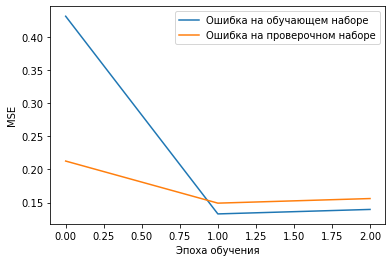

Средняя ошибка:  87362.0
Средняя цена:  530277.0
Процент ошибки: 16.0%
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2500)              8022500   
_________________________________________________________________
dense_1 (Dense)              (None, 2500)              6252500   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2501      
Total params: 14,277,501
Trainable params: 14,277,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10119 samples
Epoch 1/3
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0669 - val_loss: 0.1182
Epoch 2/3
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0496 - val_loss: 0.1081
Epoch 3/3
60000/60000 [=============

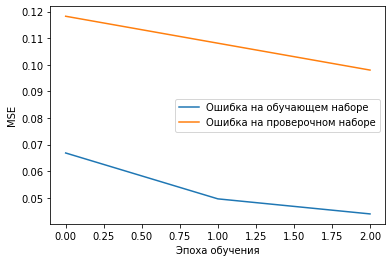

Средняя ошибка:  68874.0
Средняя цена:  530277.0
Процент ошибки: 13.0%
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2500)              8022500   
_________________________________________________________________
dense_4 (Dense)              (None, 2500)              6252500   
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              2501000   
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1001      
Total params: 17,778,001
Trainable params: 17,778,001
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate

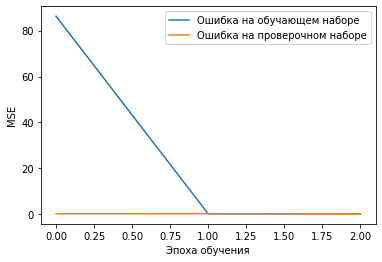

Средняя ошибка:  87677.0
Средняя цена:  530277.0
Процент ошибки: 17.0%
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2500)              8022500   
_________________________________________________________________
dense_4 (Dense)              (None, 2500)              6252500   
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              2501000   
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1001      
Total params: 17,778,001
Trainable params: 17,778,001
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate

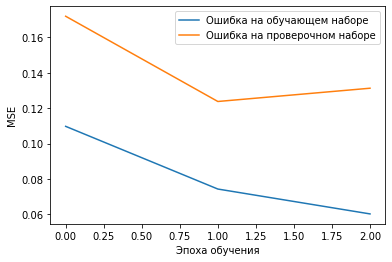

Средняя ошибка:  75830.0
Средняя цена:  530277.0
Процент ошибки: 14.0%
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2500)              8022500   
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              2501000   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 1001      
Total params: 10,524,501
Trainable params: 10,524,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10119 samples
Epoch 1/3
60000/60000 [==============================] - 83s 1ms/sample - loss: 1.9779 - val_loss: 2.1309
Epoch 2/3
60000/60000 [==============================] - 82s 1ms/sample - loss: 1.9779 - val_loss: 2.1309
Epoch 3/3
60000/60000 [===========

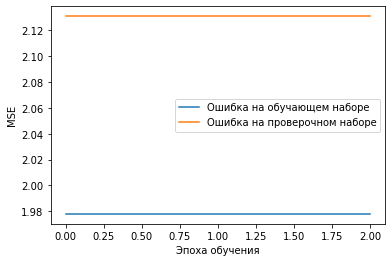

Средняя ошибка:  764078.0
Средняя цена:  530277.0
Процент ошибки: 144.0%
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2500)              8022500   
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              2501000   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 1001      
Total params: 10,524,501
Trainable params: 10,524,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10119 samples
Epoch 1/3
60000/60000 [==============================] - 54s 895us/sample - loss: 1.9779 - val_loss: 2.1309
Epoch 2/3
60000/60000 [==============================] - 54s 895us/sample - loss: 1.9779 - val_loss: 2.1309
Epoch 3/3
60000/60000 [=====

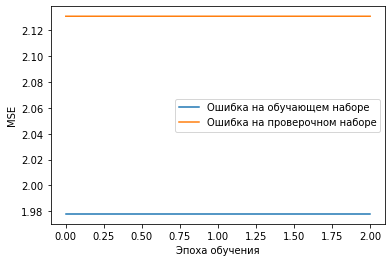

Средняя ошибка:  764078.0
Средняя цена:  530277.0
Процент ошибки: 144.0%
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2500)              8022500   
_________________________________________________________________
dropout (Dropout)            (None, 2500)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2500)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2501      
Total params: 14,277,501
Trainable params: 14,277,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, valida

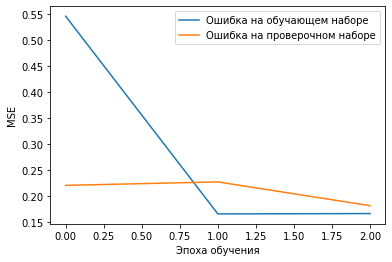

Средняя ошибка:  104030.0
Средняя цена:  530277.0
Процент ошибки: 20.0%
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2500)              8022500   
_________________________________________________________________
dropout (Dropout)            (None, 2500)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2500)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2501      
Total params: 14,277,501
Trainable params: 14,277,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validat

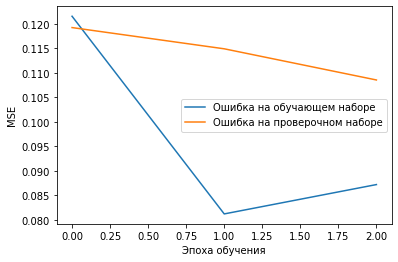

Средняя ошибка:  79882.0
Средняя цена:  530277.0
Процент ошибки: 15.0%
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2500)              8022500   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2500)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dropout_3 (Dropout)          (None, 2500)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dropout_4 (Dropout)          (None, 2500)              0         
_________________________________________________

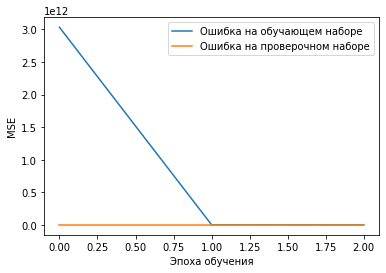

Средняя ошибка:  330941.0
Средняя цена:  530277.0
Процент ошибки: 62.0%
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2500)              8022500   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2500)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dropout_3 (Dropout)          (None, 2500)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dropout_4 (Dropout)          (None, 2500)              0         
________________________________________________

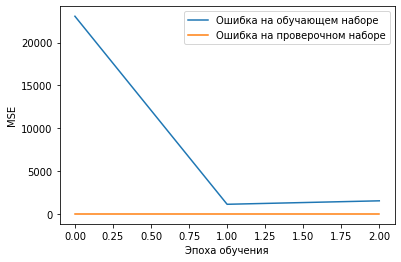

Средняя ошибка:  330939.0
Средняя цена:  530277.0
Процент ошибки: 62.0%
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 2500)              8022500   
_________________________________________________________________
dense_20 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 2501      
Total params: 14,277,501
Trainable params: 14,277,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10119 samples
Epoch 1/3
60000/60000 [==============================] - 129s 2ms/sample - loss: 1.0986 - val_loss: 1.4591
Epoch 2/3
60000/60000 [==============================] - 127s 2ms/sample - loss: 1.2380 - val_loss: 1.3701
Epoch 3/3
60000/60000 [========

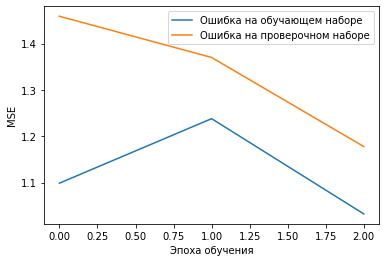

Средняя ошибка:  466537.0
Средняя цена:  530277.0
Процент ошибки: 88.0%
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 2500)              8022500   
_________________________________________________________________
dense_20 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 2501      
Total params: 14,277,501
Trainable params: 14,277,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10119 samples
Epoch 1/3
60000/60000 [==============================] - 80s 1ms/sample - loss: 1.0262 - val_loss: 1.1791
Epoch 2/3
60000/60000 [==============================] - 79s 1ms/sample - loss: 1.0260 - val_loss: 1.1698
Epoch 3/3
60000/60000 [==========

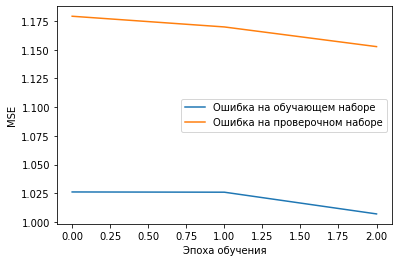

Средняя ошибка:  458420.0
Средняя цена:  530277.0
Процент ошибки: 86.0%
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 2500)              8022500   
_________________________________________________________________
dense_23 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 2501      
Total params: 14,277,501
Trainable params: 14,277,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10119 samples
Epoch 1/3
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.3205 - val_loss: 0.3441
Epoch 2/3
60000/60000 [==============================] - 128s 2ms/sample - loss: 0.2651 - val_loss: 0.3295
Epoch 3/3
60000/60000 [========

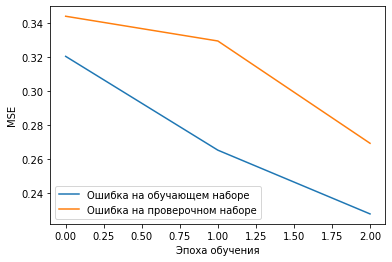

Средняя ошибка:  215907.0
Средняя цена:  530277.0
Процент ошибки: 41.0%
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 2500)              8022500   
_________________________________________________________________
dense_23 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 2501      
Total params: 14,277,501
Trainable params: 14,277,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10119 samples
Epoch 1/3
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.1984 - val_loss: 0.2534
Epoch 2/3
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.1896 - val_loss: 0.2481
Epoch 3/3
60000/60000 [==========

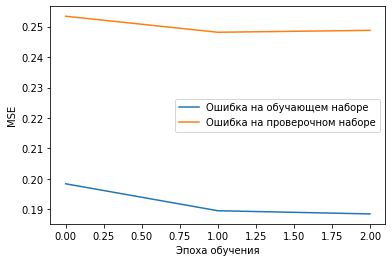

Средняя ошибка:  214248.0
Средняя цена:  530277.0
Процент ошибки: 40.0%


In [24]:
for net in nets:
  for batch in batches:
    print(net.summary())
    train_net(net, batch, 3)

In [0]:
print(nets)

[<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fdd88d28898>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fdd88d28cf8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fdd88d28d30>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fdd88c2b7b8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fdd88c65cf8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fdd88bd2630>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fdd88b49f98>]


In [0]:
models

In [0]:
d = net1()

In [0]:
d